#  BREAST CANCER DATASET - BINARY CLASSIFICATION PREDICTION

## 1. Project Overview:
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous)

The objective of this project is to analyze these tumors using machine learning to classify the tumors into benign or malignant tumors.  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


#### Dataset source:  https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data
##### Data Contents:
- The dataset was downloaded from Kaggle and was referred to as the Breast Cancer Wisconsin (Diagnostic) Dataset.
  - Unique ID:  Unique incidence of data.
  - Diagnosis: Indicates whether the tumor is malignant (M) or benign (B). This is the target variable, used to classify the tumor type based on other features.
  - Radius Mean:  The average distance from the center to the perimeter of the tumor lobes. A larger radius may indicate a more aggressive or irregular tumor.
  - Texture Mean:  The average variation in the grayscale intensity of the tumor's surface texture. This feature could relate to the heterogeneity of the tumor, with more variable textures potentially indicating malignancy.
  - Perimeter Mean:  The average measurement around the boundary of the tumor lobes. A larger perimeter could signify irregular or more invasive tumor growth.
  - Area Mean:  The average area covered by the tumor lobes. Larger areas may be associated with more advanced or invasive tumors.
  - Smoothness Mean:  The average measure of how smooth or regular the edges of the tumor are. Lower smoothness might suggest more irregular tumor boundaries, which could indicate malignancy.
  - Compactness Mean:  Calculated as the square of the perimeter divided by the area, it measures how tightly packed the tumor cells are. A higher compactness may indicate more aggressive tumor behavior.
  - Concavity Mean:  The average extent of concave (inward) regions along the tumor boundary. More concavity may suggest irregular, invasive tumor growth.
  - Concave Points Mean:  The average number of concave points on the tumor boundary. More concave points are often associated with more irregular tumor shapes, which could be an indicator of malignancy.

In [2]:
# Set pandas display precision for floats
pd.set_option('display.precision', 3)  # Set to 2 decimal places

## 2. Data Input

In [3]:
data_filepath = '/kaggle/input/breast-cancer-dataset/breast-cancer.csv'
df_tumors = pd.read_csv(data_filepath)

In [4]:
df_tumors.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,...,25.38,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119
1,842517,M,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,...,24.99,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089
2,84300903,M,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,...,23.57,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088
3,84348301,M,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,...,14.91,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173
4,84358402,M,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,...,22.54,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077


In [5]:
df_tumors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## 3. Data Cleaning

In [6]:
df_tumors.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
#  check for NaN values
print('Number of NaN Values for Each Feature:')
df_tumors.isna().sum()

Number of NaN Values for Each Feature:


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
#  check for duplicate rows of data
print(f'Number of Duplicate Rows of Data:  {df_tumors.duplicated().sum()}')

Number of Duplicate Rows of Data:  0


In [9]:
#  Check for number of unique categories in diagnosis column
df_tumors.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [10]:
df_tumors.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [11]:
#  Convert target variable to binary value using map function
df_tumors['diagnosis_M'] = df_tumors['diagnosis'].map({'M': 1, 'B': 0})

## 4. Exploratory Data Analysis

In [12]:

df_tumors.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
count,5.690e+02,569,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037e+07,NaN,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,...,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084,0.373
std,1.250e+08,NaN,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,...,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018,0.484
min,8.670e+03,NaN,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,...,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.157,0.055,0.000
25%,8.692e+05,NaN,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,...,21.080,84.110,515.300,0.117,0.147,0.115,0.065,0.250,0.071,0.000
50%,9.060e+05,NaN,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,...,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080,0.000
75%,8.813e+06,NaN,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,...,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092,1.000


In [13]:
feature_columns = list(df_tumors.columns)[2:-1]

In [14]:
#  Check if columns have low variance, whether the columns have the same value throughout.  These columns either have errors or have very low predictive value.
low_variance_columns = df_tumors[feature_columns].columns[df_tumors[feature_columns].nunique() <= 1]
print(f'Number of low variance columns:  {len(low_variance_columns)}')

Number of low variance columns:  0


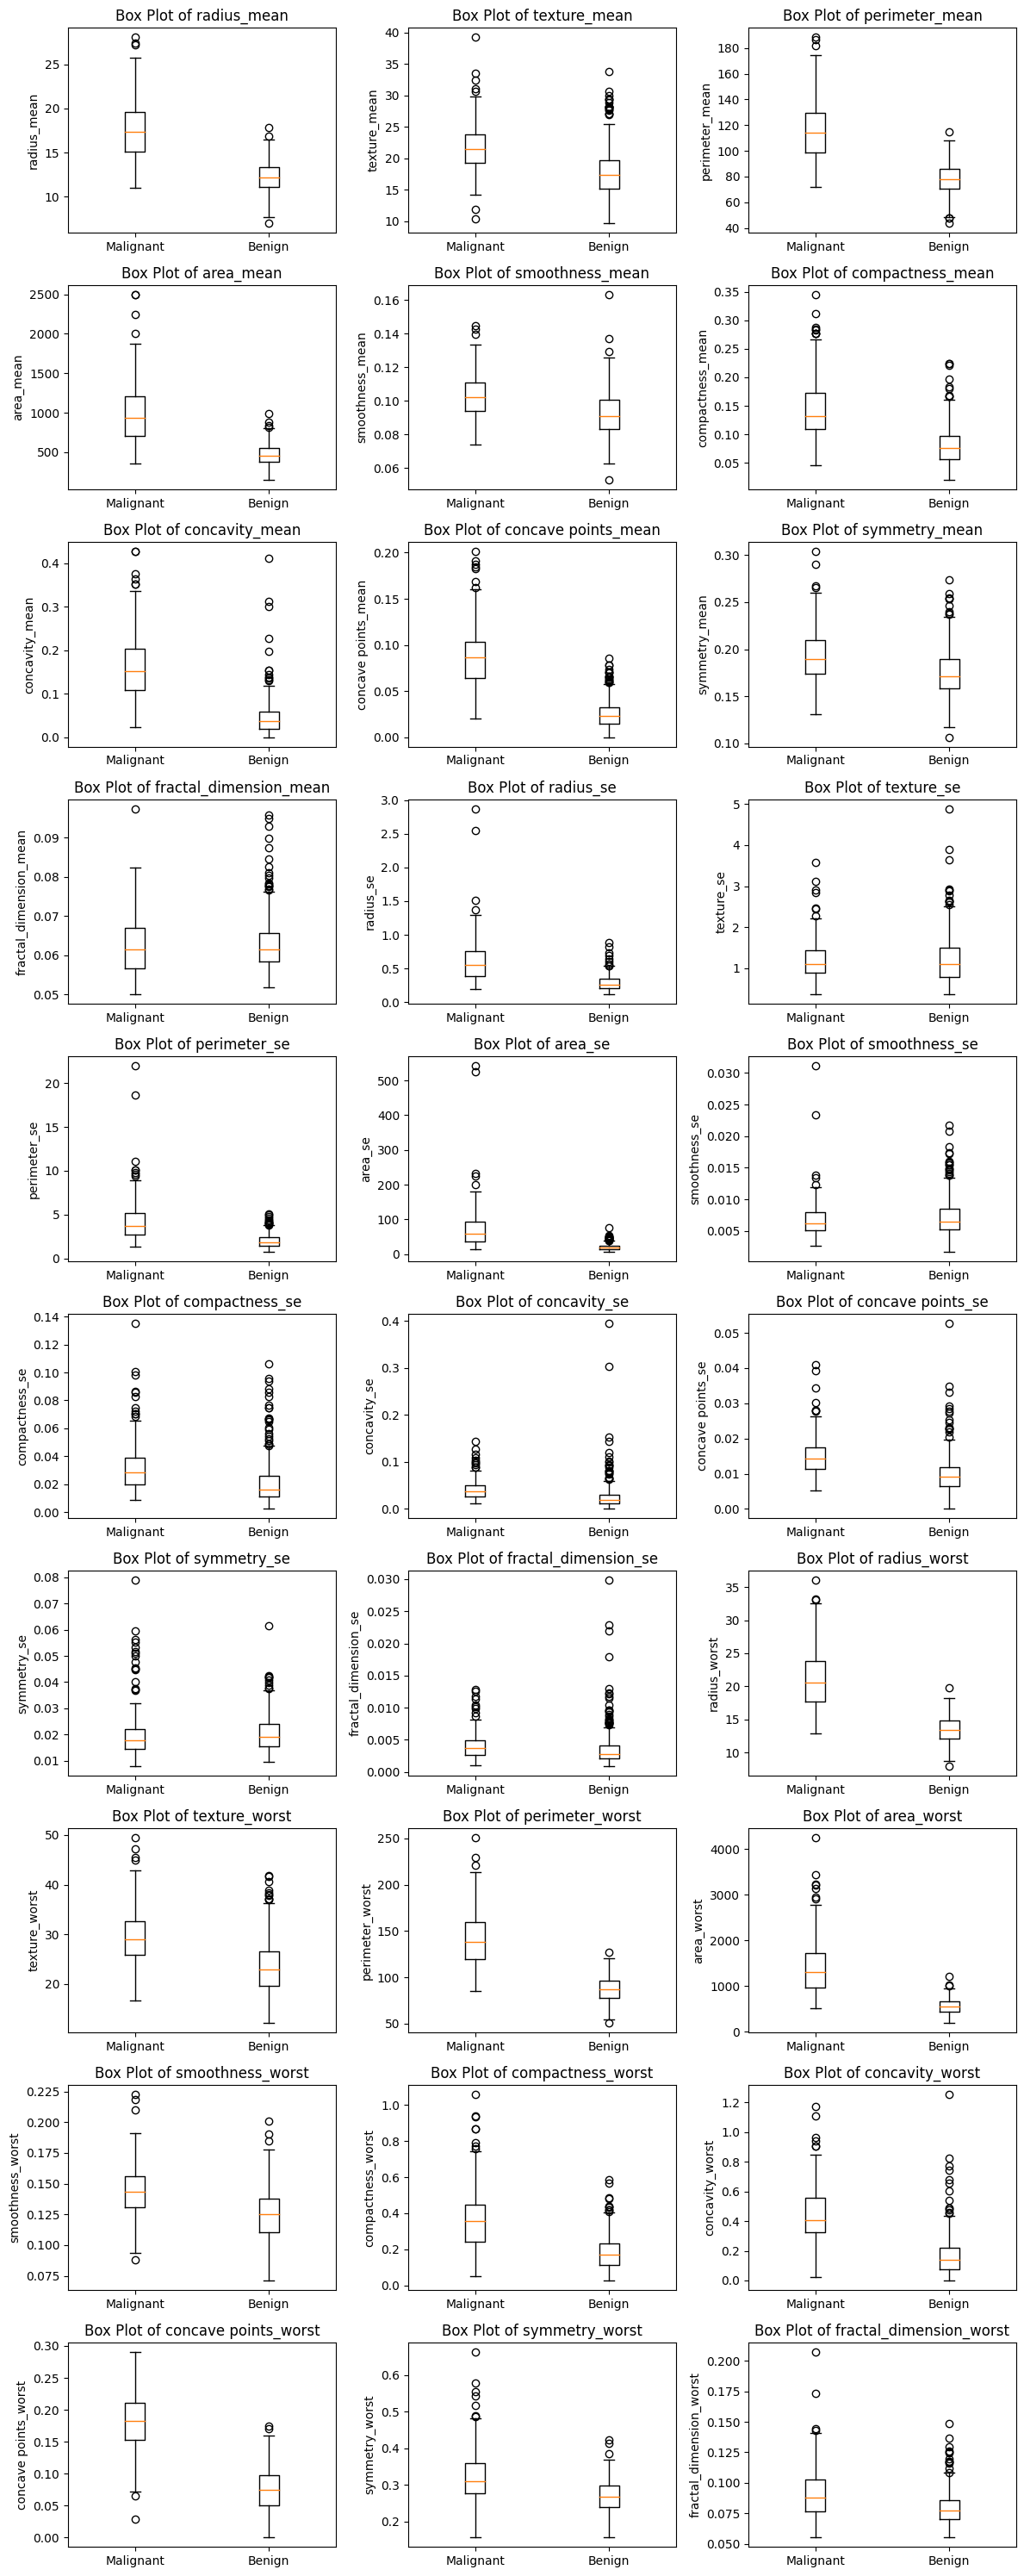

In [15]:

plot_columns = 3
plot_rows = (len(feature_columns) // plot_columns) 
fig, axs = plt.subplots(plot_rows, plot_columns, figsize = (12,30))
axs = axs.flatten() #  turns the 2D array of axes into a 1D list, which makes iterating through them easier.

for i, col in enumerate(feature_columns):
    axs[i].boxplot([df_tumors[df_tumors['diagnosis'] == 'M'][col], df_tumors[df_tumors['diagnosis'] == 'B'][col]],labels=['Malignant', 'Benign'])
    axs[i].set_title(f'Box Plot of {col}')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [16]:
Q1 = df_tumors[feature_columns].quantile(0.25)
Q3 = df_tumors[feature_columns].quantile(0.75)
IQR = Q3 - Q1
IQR
outliers = df_tumors[(df_tumors[feature_columns] < (Q1 - 1.5 * IQR)) | (df_tumors[feature_columns] > (Q3 + 1.5 * IQR))]
print(f'Rows with at least one outlier:  {len(df_tumors) - outliers.isna().all(axis=1).sum()}')
print(f'Columns with the most outliers:\n{outliers.notna().sum().sort_values(ascending=False)}')

Rows with at least one outlier:  171
Columns with the most outliers:
area_se                    65
perimeter_se               38
radius_se                  38
area_worst                 35
smoothness_se              30
compactness_se             28
fractal_dimension_se       28
symmetry_se                27
area_mean                  25
fractal_dimension_worst    24
symmetry_worst             23
concavity_se               22
texture_se                 20
concave points_se          19
concavity_mean             18
radius_worst               17
compactness_worst          16
compactness_mean           16
perimeter_worst            15
fractal_dimension_mean     15
symmetry_mean              15
radius_mean                14
perimeter_mean             13
concavity_worst            12
concave points_mean        10
smoothness_worst            7
texture_mean                7
smoothness_mean             6
texture_worst               5
id                          0
concave points_worst        0
d

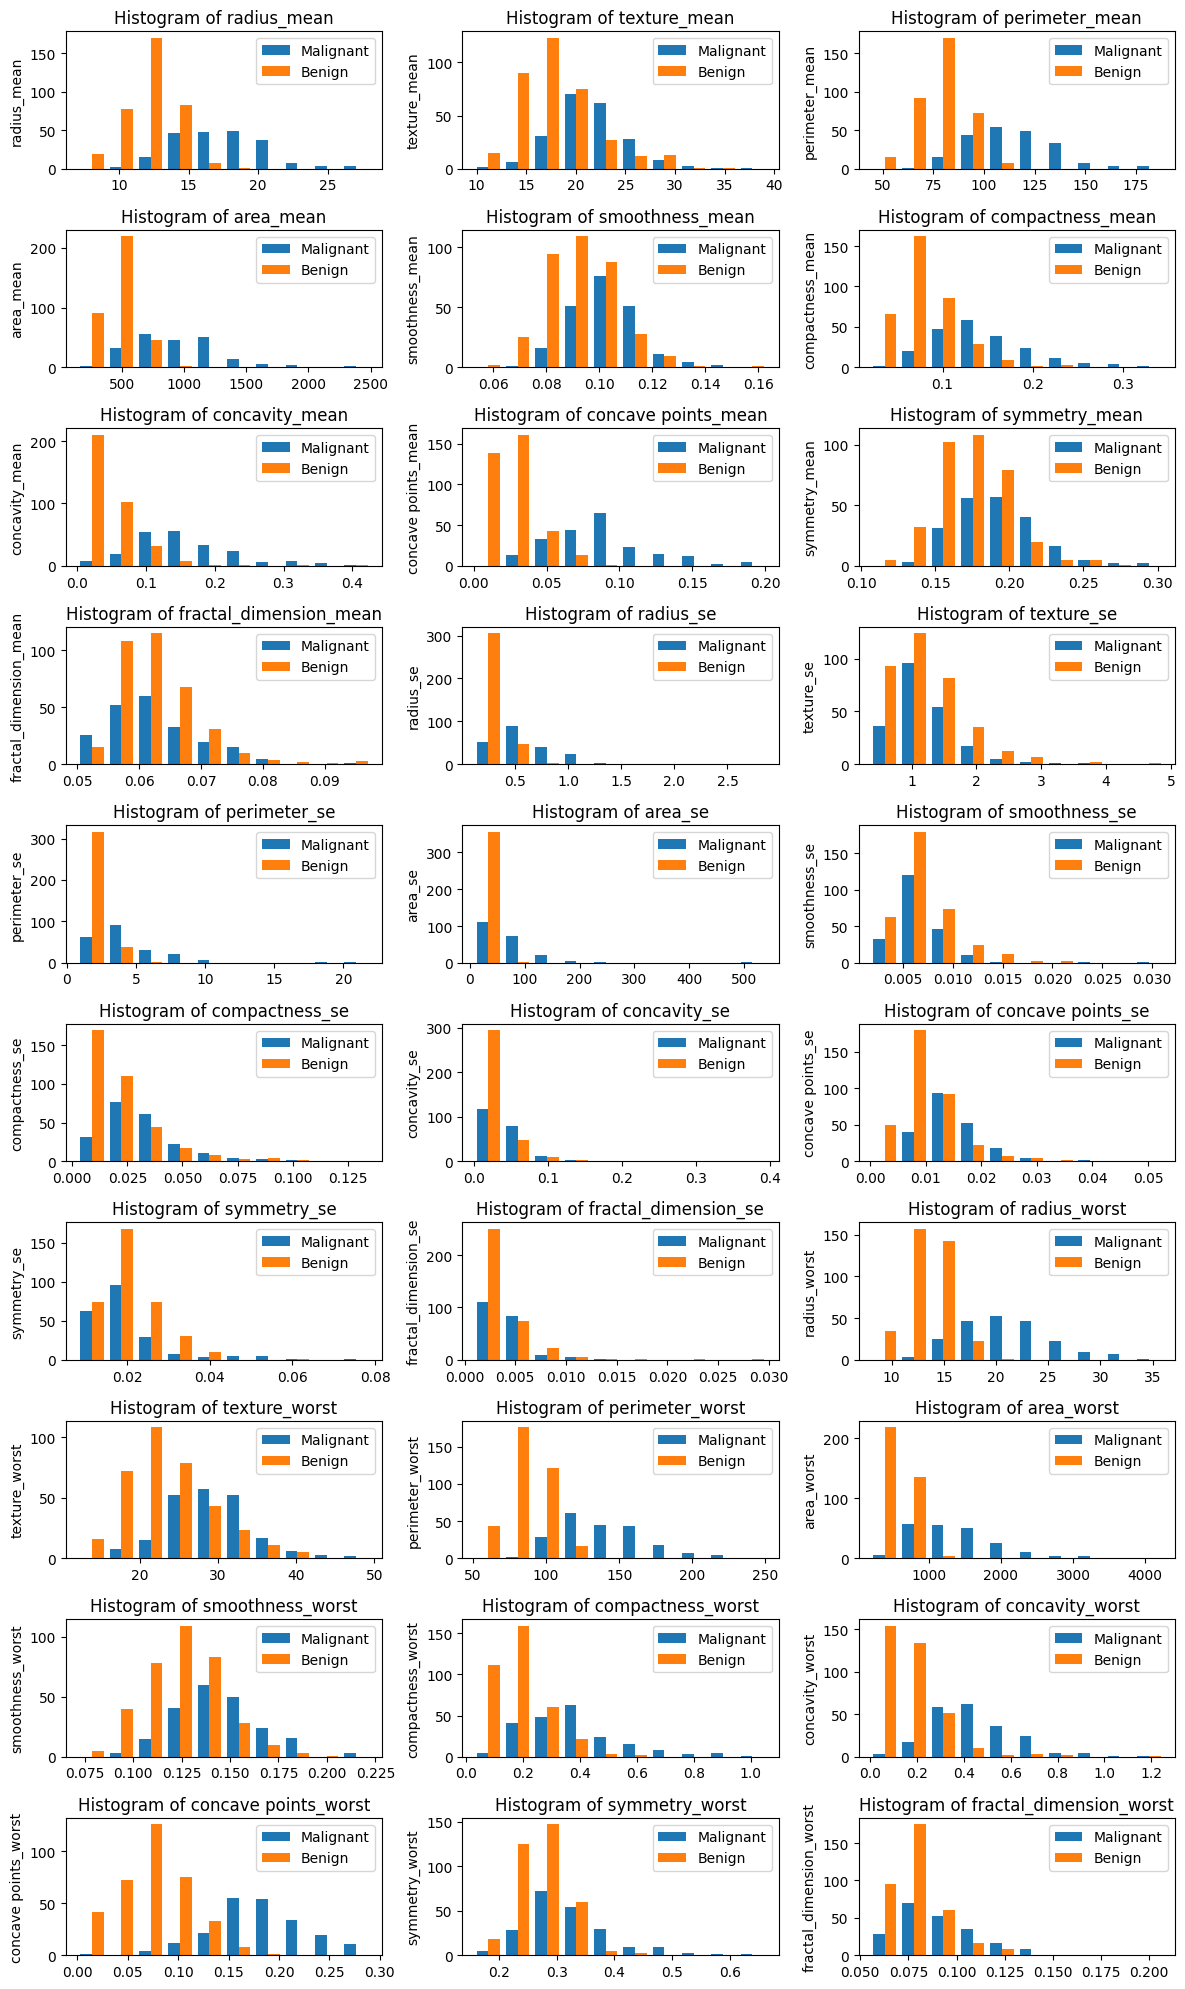

In [17]:
#  Create a histogram of each variable

plot_columns = 3
plot_rows = (len(feature_columns) // plot_columns) 
fig, axs = plt.subplots(plot_rows, plot_columns, figsize = (12,20))
axs = axs.flatten() #  turns the 2D array of axes into a 1D list, which makes iterating through them easier.

for i, col in enumerate(feature_columns):
    axs[i].hist([df_tumors[df_tumors['diagnosis'] == 'M'][col], df_tumors[df_tumors['diagnosis'] == 'B'][col]],label=['Malignant', 'Benign'])
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_ylabel(col)
    axs[i].legend()
plt.tight_layout()
plt.show()

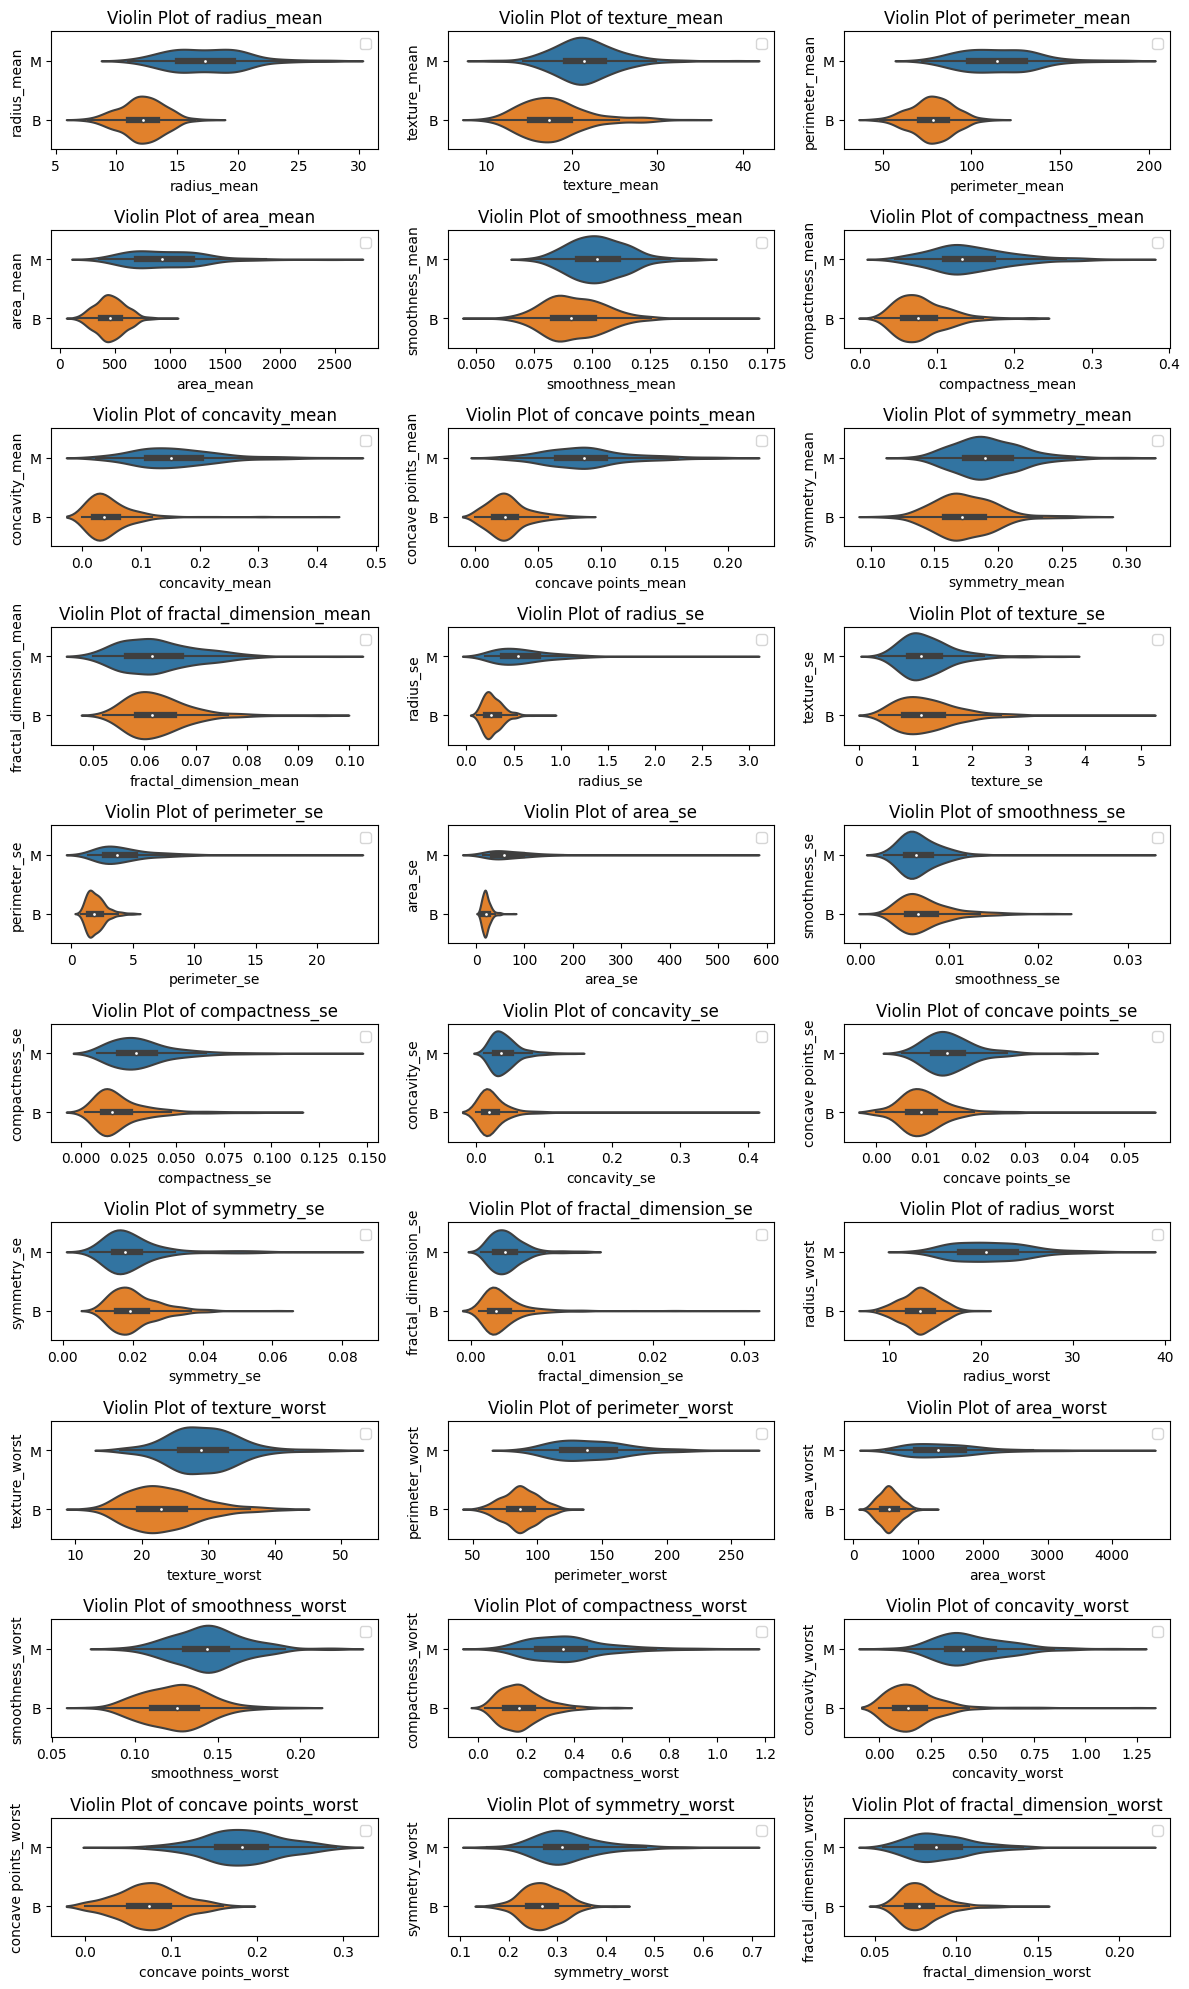

In [18]:
#  What kind of plots are good at showing relationship with a categorical taget variable?

plot_columns = 3
plot_rows = (len(feature_columns) // plot_columns) 
fig, axs = plt.subplots(plot_rows, plot_columns, figsize = (12,20))
axs = axs.flatten() #  turns the 2D array of axes into a 1D list, which makes iterating through them easier.

for i, col in enumerate(feature_columns):
    sns.violinplot(data=df_tumors, x=col, y='diagnosis', ax=axs[i])
    axs[i].set_title(f'Violin Plot of {col}')
    axs[i].set_ylabel(col)
    axs[i].legend()
plt.tight_layout()
plt.show()

## 5. Feature Engineering

In [19]:
#  Function to score accuracy of models
def evaluate_models(X, y, feature_case, cv=5):
    """
    Function to evaluate 5 different models and return cross-validation results.
    
    Parameters:
    X: pd.DataFrame or np.array, Features
    y: pd.Series or np.array, Target binary variable
    cv: int, number of cross-validation folds (default=5)
    
    Returns:
    pd.DataFrame with mean cross-validation scores for each model
    """
    scaler = StandardScaler()
    X = X.copy()
    
    X_scaled = scaler.fit_transform(X)
    
    
    # Define models to test
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'SVM': SVC(probability=True),
        'K-Nearest Neighbors': KNeighborsClassifier()
    }
    
    # Dictionary to store results
    results = {}
    
    # Loop over models and calculate cross-validation score
    for name, model in models.items():
        scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')  # You can use other metrics like 'roc_auc', 'f1', etc.
        results[name] = scores.mean()

    
    # Convert the results to a DataFrame for easy comparison
    results_df = pd.DataFrame(results.items(), columns=['Model', 'Mean CV Accuracy'])
    results_df['Feature_set_case'] = feature_case
    
    return results_df

### Evaluating Correlation between Feature and Target Variables.
-  Point Bi-Serial Correlation:
    - Special case of the pearson correlation that measures the relationship between a continous variable and a binary target variable.
    - Assesses how the mean of a numerical variable differs across the two categories of the binary variable.
-  Measuring Collinearity between Feature Variables:
    - Evaluate the correlation between feature variables.
    - Flag correlation above a threshold.
-  Test model accuracy for each adjustment to feature variables to see any changes.

####  Baseline Model Scores on Raw Dataset 

In [20]:
#  Measure baseline performance of models.
df_prelim_model_results = pd.DataFrame()
X = df_tumors[feature_columns]
y = df_tumors['diagnosis_M']

df_baseline = evaluate_models(X,y, 'baseline')
df_prelim_model_results = pd.concat([df_prelim_model_results, df_baseline])
df_prelim_model_results


,Model,Mean CV Accuracy,Feature_set_case
0,Logistic Regression,0.981,baseline
1,Random Forest,0.958,baseline
2,Gradient Boosting,0.961,baseline
3,SVM,0.974,baseline
4,K-Nearest Neighbors,0.965,baseline


In [21]:
# Investigate the correlation between the continuous feature variables and the categorical target variable.
y_col = 'diagnosis_M'
x_vars, y_vars, corr_coefs, p_vals = [], [], [], []
for col in feature_columns:
    x_vars.append(col)
    y_vars.append('Malignant')
    coef, p_val = pointbiserialr(df_tumors[col], df_tumors[y_col])
    corr_coefs.append(coef)
    p_vals.append(p_val)
df_corr_p_val = pd.DataFrame({'x_variable': x_vars, 'y_variable':y_vars, 'correlation_coef': corr_coefs, 'p_value': p_vals}).sort_values('p_value', ascending=True)
df_corr_p_val

,x_variable,y_variable,correlation_coef,p_value
27,concave points_worst,Malignant,0.794,1.969e-124
22,perimeter_worst,Malignant,0.783,5.771e-119
7,concave points_mean,Malignant,0.777,7.101e-116
20,radius_worst,Malignant,0.776,8.482e-116
2,perimeter_mean,Malignant,0.743,8.436e-101
23,area_worst,Malignant,0.734,2.829e-97
0,radius_mean,Malignant,0.730,8.466e-96
3,area_mean,Malignant,0.709,4.735e-88
6,concavity_mean,Malignant,0.696,9.967e-84
26,concavity_worst,Malignant,0.660,2.465e-72


In [22]:
#  Screen features with moderate to high correlation coeff and low p_value
corr_p_val_filter = (df_corr_p_val['correlation_coef'] > 0.5) & (df_corr_p_val['p_value'] < 0.01)
features_screen1 = df_corr_p_val[corr_p_val_filter]
features_screen1

,x_variable,y_variable,correlation_coef,p_value
27,concave points_worst,Malignant,0.794,1.969e-124
22,perimeter_worst,Malignant,0.783,5.771e-119
7,concave points_mean,Malignant,0.777,7.101e-116
20,radius_worst,Malignant,0.776,8.482e-116
2,perimeter_mean,Malignant,0.743,8.436e-101
23,area_worst,Malignant,0.734,2.829e-97
0,radius_mean,Malignant,0.730,8.466e-96
3,area_mean,Malignant,0.709,4.735e-88
6,concavity_mean,Malignant,0.696,9.967e-84
26,concavity_worst,Malignant,0.660,2.465e-72


In [23]:
#  Measure feature_screen_1, smaller subset of high corr and low p_val
X = df_tumors[list(features_screen1.x_variable)]
y = df_tumors['diagnosis_M']

df_corr_pval_screen = evaluate_models(X,y, 'Feature Screen 1')
df_prelim_model_results = pd.concat([df_prelim_model_results, df_corr_pval_screen])
df_prelim_model_results


,Model,Mean CV Accuracy,Feature_set_case
0,Logistic Regression,0.981,baseline
1,Random Forest,0.958,baseline
2,Gradient Boosting,0.961,baseline
3,SVM,0.974,baseline
4,K-Nearest Neighbors,0.965,baseline
0,Logistic Regression,0.946,Feature Screen 1
1,Random Forest,0.946,Feature Screen 1
2,Gradient Boosting,0.937,Feature Screen 1
3,SVM,0.935,Feature Screen 1
4,K-Nearest Neighbors,0.935,Feature Screen 1


####  Above features seem highly correlated to the target.
-  Check whether any of these variables are collinearly related to each other.

Highly correlated pairs:
('concave points_worst', 'concave points_mean')
('perimeter_worst', 'radius_worst')
('perimeter_worst', 'perimeter_mean')
('perimeter_worst', 'area_worst')
('perimeter_worst', 'radius_mean')
('perimeter_worst', 'area_mean')
('concave points_mean', 'concavity_mean')
('radius_worst', 'perimeter_mean')
('radius_worst', 'area_worst')
('radius_worst', 'radius_mean')
('radius_worst', 'area_mean')
('perimeter_mean', 'area_worst')
('perimeter_mean', 'radius_mean')
('perimeter_mean', 'area_mean')
('area_worst', 'radius_mean')
('area_worst', 'area_mean')
('radius_mean', 'area_mean')
('radius_se', 'perimeter_se')
('radius_se', 'area_se')
('perimeter_se', 'area_se')


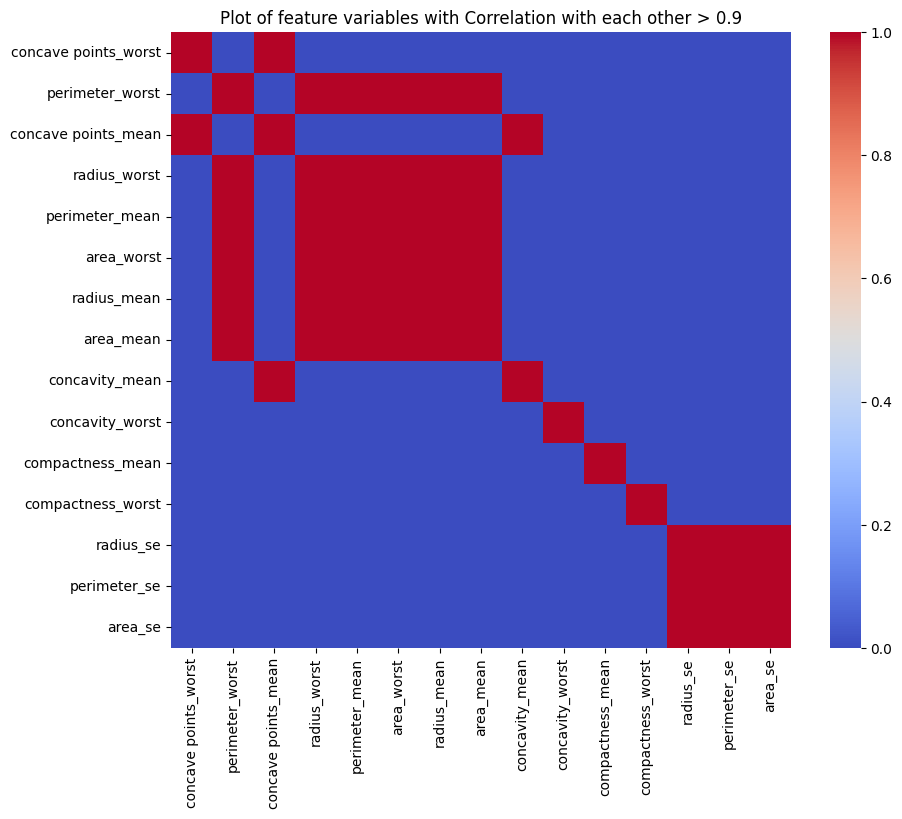

In [24]:
features_screened = list(features_screen1.x_variable)
threshold = 0.90
co_linear = df_tumors[features_screened].corr() > threshold
plt.figure(figsize=(10,8))
sns.heatmap(co_linear, annot=False, cmap='coolwarm')
plt.title('Plot of feature variables with Correlation with each other > 0.9')
#  
corr_matrix = df_tumors[features_screened].corr()
high_corr_features = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]

# Print highly correlated feature pairs
print("Highly correlated pairs:")
for pair in high_corr_pairs:
    print(pair)

###  Observations on potential Multicollinear variables:
-  radius_mean, perimeter_mean, and area_mean appear to be co-linear (makes sense).
-  radius_mean and radius_worst also seems co-dependent with radius_worst and perimeter_worst
-  radius_se are also co-dependent with perimeter_se and area_se.
-  Conclusion:  Use radius_mean and radius_se only and disregard all perimeter or area features.  Run model with and without these features to see the effect.

In [25]:
#  Select the features which have a high correlation with target variable (> .50), low p_value (< 0.01) and do not show collinearity (collineararity > 0.90) with other features.
features_screened_d = ['concave points_worst','perimeter_worst', 'concavity_mean', 'concavity_worst', 'compactness_mean', 'compactness_worst']

In [26]:
#  Measure feature_screen_1, smaller subset of high corr and low p_val

X = df_tumors[features_screened_d]
y = df_tumors['diagnosis_M']

df_corr_pval_coll_screen = evaluate_models(X,y, 'Eliminate Collinear Variables')

df_prelim_model_results = pd.concat([df_prelim_model_results, df_corr_pval_coll_screen])
df_prelim_model_results


,Model,Mean CV Accuracy,Feature_set_case
0,Logistic Regression,0.981,baseline
1,Random Forest,0.958,baseline
2,Gradient Boosting,0.961,baseline
3,SVM,0.974,baseline
4,K-Nearest Neighbors,0.965,baseline
0,Logistic Regression,0.946,Feature Screen 1
1,Random Forest,0.946,Feature Screen 1
2,Gradient Boosting,0.937,Feature Screen 1
3,SVM,0.935,Feature Screen 1
4,K-Nearest Neighbors,0.935,Feature Screen 1


###  The full set of features provides better accuracy for all models based on cross-validation.
-  Test if Principal Component Analysis improves the accuracy when applied to all of the variables?
-  Are there any features which can be created to improve accuracy?

In [27]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

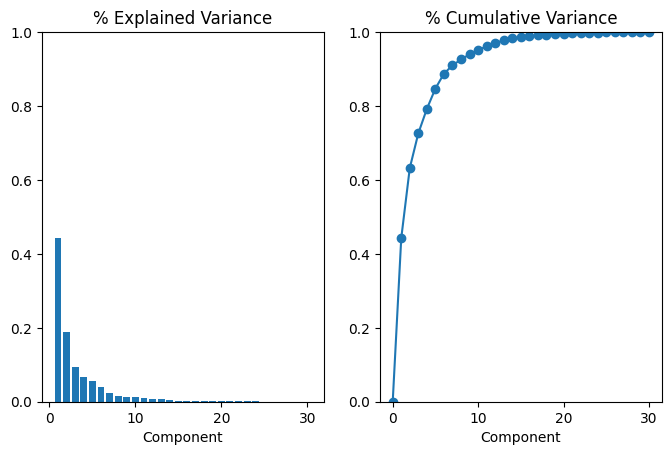

In [28]:
# Create principal components
X = df_tumors[feature_columns].copy()
y = df_tumors['diagnosis_M']
X_scaled = (X-X.mean())/X.std()
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()
plot_variance(pca, width=8, dpi=100)

In [29]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
radius_mean,0.219,-0.234,-0.009,0.041,0.038,1.874e-02,-1.241e-01,-0.007,-0.223,0.095,...,-6.857e-02,0.073,-9.855e-02,0.183,0.019,-0.129,-0.132,2.112e-01,2.115e-01,-7.024e-01
texture_mean,0.104,-0.060,0.065,-0.603,-0.049,-3.218e-02,1.140e-02,0.131,0.113,0.241,...,4.484e-01,0.095,-5.550e-04,-0.099,-0.085,-0.025,-0.017,-6.581e-05,-1.053e-02,-2.737e-04
perimeter_mean,0.228,-0.215,-0.009,0.042,0.037,1.731e-02,-1.145e-01,-0.019,-0.224,0.086,...,-6.977e-02,0.075,-4.024e-02,0.117,-0.027,-0.125,-0.115,8.434e-02,3.838e-01,6.899e-01
area_mean,0.221,-0.231,0.029,0.053,0.010,-1.888e-03,-5.165e-02,0.035,-0.196,0.075,...,-1.844e-02,0.098,7.777e-03,-0.070,0.210,0.363,0.467,-2.725e-01,-4.228e-01,3.295e-02
smoothness_mean,0.143,0.186,-0.104,0.159,-0.365,-2.864e-01,-1.407e-01,-0.289,0.006,-0.069,...,-1.195e-01,0.064,-2.067e-02,-0.069,-0.029,-0.037,0.070,1.479e-03,-3.435e-03,4.847e-03
compactness_mean,0.239,0.152,-0.074,0.032,0.012,-1.413e-02,3.092e-02,-0.151,-0.168,0.013,...,1.926e-01,-0.098,5.236e-02,0.104,-0.397,0.263,0.098,-5.463e-03,-4.102e-02,-4.467e-02
concavity_mean,0.258,0.060,0.003,0.019,0.086,-9.344e-03,-1.075e-01,-0.073,0.041,-0.136,...,5.572e-03,-0.185,3.249e-01,-0.045,0.097,-0.549,0.365,4.554e-02,-1.001e-02,-2.514e-02
concave points_mean,0.261,-0.035,-0.026,0.065,-0.044,-5.205e-02,-1.505e-01,-0.152,-0.112,0.008,...,-9.424e-03,-0.312,-5.141e-02,-0.084,0.186,0.388,-0.455,-8.883e-03,-4.207e-03,1.077e-03
symmetry_mean,0.138,0.190,-0.040,0.067,-0.306,3.565e-01,-9.389e-02,-0.232,0.256,0.572,...,-8.694e-02,-0.018,-5.120e-02,-0.019,0.025,-0.016,-0.015,1.433e-03,-7.570e-03,1.280e-03
fractal_dimension_mean,0.064,0.367,-0.023,0.049,-0.044,-1.194e-01,2.958e-01,-0.177,-0.124,0.081,...,-7.627e-02,0.288,-8.469e-02,0.133,0.207,-0.097,-0.101,-6.312e-03,7.301e-03,4.756e-03


In [30]:
df_PCA = evaluate_models(X_pca,y, 'Principal Component Analysis')
df_prelim_model_results = pd.concat([df_prelim_model_results, df_PCA])
df_prelim_model_results.sort_values('Mean CV Accuracy', ascending=False)

,Model,Mean CV Accuracy,Feature_set_case
0,Logistic Regression,0.981,baseline
3,SVM,0.974,baseline
4,K-Nearest Neighbors,0.965,baseline
0,Logistic Regression,0.963,Principal Component Analysis
2,Gradient Boosting,0.961,baseline
1,Random Forest,0.958,baseline
2,Gradient Boosting,0.947,Principal Component Analysis
0,Logistic Regression,0.946,Feature Screen 1
1,Random Forest,0.946,Feature Screen 1
3,SVM,0.940,Eliminate Collinear Variables


####  Feature Findings:
-  Model performed best with all features, even features which displayed collinearity with other features.
-  Logistic Regression Model performed best, followed by SVM and KNN

## 6. Modeling and Evaluation
-  Tune the leading models with GridSearchCV
-  Train and Test the leading model with a training and test set
-  Plot a confusion matrix of the model results.

In [31]:
#  plot a confusion matrix when given the actual y_test and Y_predicted
def plot_confusion_matrix(y_test, y_predict):
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_predict)
    #  plot confusion matrix
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    
    # Step 3: Add labels, title, and axis names
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Step 4: Show the plot
    plt.show()

####  Use GridSearch to Tune the Logistic Regression Model

In [32]:
X = df_tumors[feature_columns].copy()
y = df_tumors['diagnosis_M']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Create the logistic regression model
log_regr_model_grid = LogisticRegression()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],  # Based on penalty choice
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(log_regr_model_grid, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_scaled, y)

# Get the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)
best_model_lr = grid_search.best_estimator_

Best parameters:  {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'solver': 'liblinear'}
Best accuracy:  0.982425089271852


Accuracy: 0.99


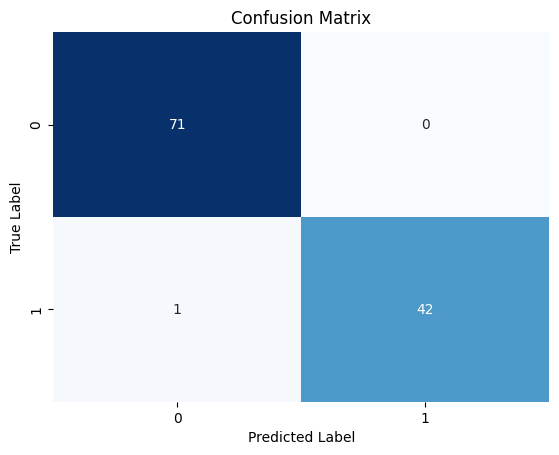

In [34]:
#  Create a training and test model set and test the model, and plot the confusion matrix.
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

best_model_lr.fit(X_train_scaled, y_train)
y_predict = best_model_lr.predict(X_test_scaled)

#  Evaluate model accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")

plot_confusion_matrix(y_test, y_predict)

In [35]:
# Classification report
class_report = classification_report(y_test, y_predict)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Best parameters:  {'C': 1, 'class_weight': 'balanced', 'coef0': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
Best accuracy:  0.9846153846153847
Accuracy: 0.97


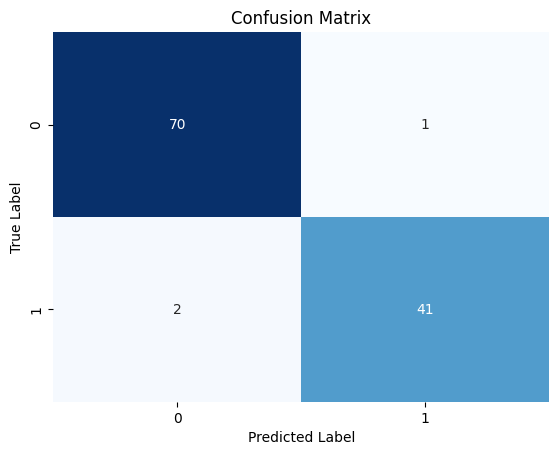

In [36]:
# Define the model
svc_grid = svm.SVC()

# Define the parameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4],  # Only relevant for 'poly' kernel
    'coef0': [0.0, 0.1, 0.5, 1],  # Relevant for 'poly' and 'sigmoid'
    'class_weight': [None, 'balanced'],
}

# Set up GridSearchCV
svc_grid_search = GridSearchCV(svc_grid, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
svc_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
print("Best parameters: ", svc_grid_search.best_params_)
print("Best accuracy: ", svc_grid_search.best_score_)
best_model_svc = svc_grid_search.best_estimator_

best_model_svc.fit(X_train_scaled, y_train)
y_predict = best_model_svc.predict(X_test_scaled)

#  Evaluate model accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")

plot_confusion_matrix(y_test, y_predict)


In [37]:
# Classification report
class_report = classification_report(y_test, y_predict)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## 7. Findings and Conclusions:


-  Tumor diagnostic data was analyzed for NaN values, duplicate entries and outliers.
-  Tumor feature variables were evaluated against the transformed target variable (diagnosis).
-  Leading feature variables were then evaluated against each other to evaluate multi-collinearity and to eliminate variables which may already be captured in the model.  A correlation threshold of 0.9 was used to eliminate variables which were correlated against each other.
-  The logistic regression model with Grid Search produced a test accuracy of 99% while the SVM model with grid search produced only a 97% accuracy.
-  The logistic regression model produced a precision score of 1.0 and a recall of 0.99 for predicting a malignant tumor.
-  The SVM model produced a precision of 0.98 and recall of 0.95 for predicing a malignant tumor.
-  While both models are very accurate, the logistic regression model was more accurate and with a recall of 0.99, this means that the predicted values were very close to predicting positives (1% false negatives).  This is useful for a cancer diagnosis prediction because you do not want to miss a positive diagnosis with the model predicting a benign tumor when it is in fact malignant.
-  The cost of a false negative is much higher than the cost of a false positive.  While a false positive will give a patient more stress and could incur further testing costs (biopsy, scans, potential treatment), a false negative could incur a false sense of security in a patient and meanwhile the cancer could enlarge or progress further, which could be tragic. 

## 8. Acknowledgements:
-  This work relies on data provided by Kaggle user M Yasser H. The data is greatly appreciated.